![ads](https://balloon.tam.ch/share/92f7b007f6c4262cccfa36e4341463bb)

# Auftrag 7: Upper confidence bound

**Upper Confidence Bound** (kurz: UCB) bezeichnet eine Klasse von Algorithmen, die nach dem Prinzip des *Reinforcement Learning* (deutsch bestärkendes Lernen) **Explore-Exploit-Tradeoffs** lösen.

Die Algorithmen haben Anwendungen in ganz unterschiedlichen Lebenbereichen (z.B. Wahl eines Restaurants, medizinische Behandlungen, Spielautomaten, usw.). In all diesen Fällen hat man die Wahl zwischen mehreren Handlungsoptionen, die man beliebig oft wiederholen kann und für die man eine variable Belohnung bekommt.

| Bereich | Belohnung |
|---------|-----------|
|Wahl von Restaurant| gutes Essen | 
|Wahl von medizinischer Behandlung | Genesung |
|Wahl von Spielautomat | Gewinn |

Jede Handlungsoption hat eine unterschiedliche Wahrscheinlichkeitsverteilung für die Belohnung. Diese ist aber zunächst *unbekannt*. Ziel der UCB-Algorithmen ist es, aus mehreren Optionen diejenige mit der **höchsten durchschnittlichen Belohnung** zu finden, um die Summe der Belohnungen zu maximieren.

*Beispiel 1*: Es wurden drei neue Medikamente gegen Malaria entwickelt. Wir nennen sie M1, M2 und M3. Sie wurden noch nie an Menschen getestet. Welches ist das Medikament mit der höchsten durchschnittlichen Genesungsrate?

In diesem Jupyter-Notebook programmieren wir eine Implementation von UCB, dessen Ziel es ist, das Social-Media-Werbebild für ein Tierheim zu finden, welches am meisten Klicks generiert. Wir zeigen nacheinenander 10'000 verschiedenen Usern ein Bild unserer Wahl und bekommen als Feedback, ob er oder sie auf das Werbebild geklickt hat oder nicht.

Um die Reaktion von Social-Media-Usern zu simulieren, verwenden wir den Datensatz `users.csv`. Jede Zeile darin entspricht einem User und jede Spalte einem der zehn Werbebilder. Steht in der Zelle in der Zeile $i$ und Spalte $j$ der Wert 1, bedeutet dies, dass der User $i$ auf das Werbebild $j$ klicken würde. Steht hingegen eine 0, würde er nicht darauf klicken.

<div class="alert alert-block alert-info">
<strong>Wichtige Konzepte</strong>

* **Reinforcement Learning**: eine Reihe von Methoden des maschinellen Lernens, bei denen ein Programm selbstständig eine Strategie erlernt, um erhaltene Belohnungen zu maximieren.
* **Explore** (englisch *erkunden*): Eine wenig bekannte Strategie ausprobieren (mit dem Risiko, dass sie weniger gut funktioniert als die beste bekannte Strategie)
* **Exploit** (englisch *nutzen*): Die beste bekannte Strategie nutzen (mit dem Risiko, dass es nicht die beste existierende Strategie ist)
* **Explore-Exploit-Tradeoff**: Abwägung, ob man eine wenig bekannte Strategie ausprobiert oder ob man die beste bekannte Strategie nutzt
</div>

## UCB in zwei Schritten

Wie bereits erwähnt, können wir 10'000 Mal ein Werbebild unserer Wahl an User eines sozialen Netzwerks ausspielen. Jede Anzeige nennen wir eine *Impression*. Die zehn Werbebilder bezeichnen wir mit den Index $i$ (0 bis 9) und jede der 10'000 Runden mit dem Index $n$ (1 bis 10'000).

**Schritt 1**: In jeder Runde $n$ werden für jedes Bild $i$ folgende Grössen berechnet:

* $N_i(n)$ : Anzahl Impressionen von Bild $i$ bis (und ohne) Runde $n$. Aussprache: *Gross-N für Bild i in Runde n*.
* $R_i(n)$ : Anzahl Klicks auf Bild $i$ bis (und ohne) Runde $n$. Aussprache: *Gross-R für Bild i in Runde n*.
* $\bar r_i(n) = \frac{R_i(n)}{N_i(n)}$ : Durchschnittliche Klickrate auf Bild $i$ bis Runde $n$. Aussprache: *Klein-R für Bild i in Runde n*.
* $\Delta_i(n) = \sqrt{\frac{3}{2} \frac{\log(n)}{N_i(n)}}$ : Hälfte der Höhe des Konfidenzintervalls von Bild $i$ in Runde $n$. Aussprache: *Delta für Bild i in Runde n*.
* $ucb_i(n) = \bar r_i(n) + \Delta_i(n)$ : Upper confidence bound von Bild $i$ in Runde $n$. Aussprache: *UCB für Bild i in Runde n*.

![bars](https://balloon.tam.ch/share/2f104cf0118d42c5bf1abc466e45e663)

**Schritt 2**: Wähle das Bild $i$ mit dem höchsten $ucb$-Wert aus und passe $N_i(n)$ und $R_i(n)$ an:

$N_i(n+1) = N_i(n) + 1$

$R_i(n+1) = R_i(n) + 1\qquad$ falls Bild geklickt wurde

$\phantom{R_i(n+1) = R_i(n)} + 0\qquad$ sonst

## Implementation in Python

<div class="alert alert-box alert-success">
    
#### Aufgabe 1

Schreiben Sie einen Befehl `ucb()` mit folgenden Parametern:

* `n`: Die aktuelle Runde (Erwarteter Datentyp: `integer`)
* `rewards`: Die Summe der Klicks $R$ von einem Bild (Erwarteter Datentyp: `integer`)
* `selections`: Die Anzahl Impressionen $N$ von einem Bild (Erwarteter Datentyp: `integer`)

Der Rückgabewert ist der UCB des Bildes, also der y-Wert der oberen Konfidenzintervallgrenze.

**Wichtig**: Wenn das Bild 0 Impressionen hat, lässt sich der UCB nicht berechnen, da man für $\Delta_i(n)$ durch 0 dividieren müsste. Geben Sie in diesem Fall einfach eine sehr grosse Zahl (z.B. $10^{400}$) zurück, damit das Bild ausgewählt wird.

</div>

In [1]:
import math


def ucb(n, rewards, selections):
    if selections > 0:
        #TODO Durchschnittliche Klickrate berechnen
        cpr = rewards / selections
        #TODO Delta berechnen
        delta = math.sqrt(
            (3/2)
            * (
                math.log(n) / selections
            )
        )
        #TODO UCB berechnen
        uc_bound = cpr + delta
    else:
        # Grosse Zahl, da bei selections == 0 UCB nicht berechenbar
        uc_bound = 1e400
        
    return uc_bound # UCB zurückgeben

<div class="alert alert-box alert-success">

#### Aufgabe 2

Schreiben Sie einen Befehl `ucb_ad()` mit folgenden Parametern:

* `n`: Die aktuelle Runde
* `rewards_list`: Liste mit der Summe der Klicks $R$ von jedem Bild
* `selections_list`: Liste mit der Anzahl Impressionen $N$ von jedem Bild

Der Rückgabewert ist der Index des Werbebildes mit dem grössten UCB-Wert.

</div>

In [2]:
def ucb_ad(n, rewards_list, selections_list):
    ad = 0            # Index von Bild mit bisher grösstem UCB
    max_uc_bound = 0  # Bisher grösster UCB

    #TODO Ad mit dem grössten UCB suchen
    for i in range(len(selections_list)):
        current_ucb = ucb(n, rewards_list[i], selections_list[i])

        if (current_ucb > max_uc_bound):
            max_uc_bound = current_ucb
            ad = i

    return ad # Index von Bild mit grösstem UCB zurückgeben

<div class="alert alert-box alert-success">

#### Aufgabe 3

Vervollständigen Sie den UCB-Algorithmus. Wählen Sie nacheinander für jeden User im Datensatz das Werbebild mit dem höchsten UCB aus und passen Sie die Variablen `numbers_of_selections`, `sums_of_rewards` und `total_reward` gemäss seiner Reaktion (Klick oder nicht Klick) an.

</div>

In [3]:
# Datensatz einlesen
import pandas as pd
users = pd.read_csv("./datasets/users.csv")

users

,ad0,ad1,ad2,ad3,ad4,ad5,ad6,ad7,ad8,ad9
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,0,0,0,0,1,0,0
9996,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,1,0,0


In [4]:
rounds = 10000                  # Anzahl Runden (Impressionen)
d = 10                          # Anzahl Bilder
numbers_of_selections = [0] * d # Anzahl Klicks pro Bild
sums_of_rewards = [0] * d       # Summe aller Klicks pro Bild
total_reward = 0                # Anzahl Klicks

# Ihr Code
for n in range(rounds):
    ad = ucb_ad(n, sums_of_rewards, numbers_of_selections)

    user_clicks = users.iloc[n, ad]

    total_reward += user_clicks
    sums_of_rewards[ad] += user_clicks
    numbers_of_selections[ad] += 1

<div class="alert alert-box alert-success">

#### Aufgabe 4

Visualisieren Sie Anzahl Impressionen und Klicks pro Werbebild in zwei matplotlib-Balkendiagrammen ([Dokumentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot)). Übergeben Sie dazu dem Befehl `plt.bar()` eine Liste mit den Werten auf der x-Achse sowie eine Liste mit der Höhe der Balken als Argument. Beschriften Sie danach das Diagramm mit den Befeheln `plt.xlabel()`, `plt.ylabel()` und `plt.title()`.

</div>

In [5]:
import matplotlib.pyplot as plt

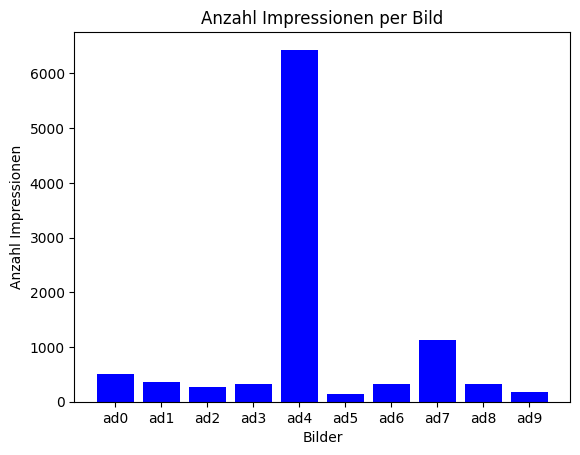

In [6]:
# Ihr Code für die Impressionen
plt.bar(users.columns, numbers_of_selections, color="blue")
plt.xlabel("Bilder")
plt.ylabel("Anzahl Impressionen")
plt.title("Anzahl Impressionen per Bild")

plt.show()


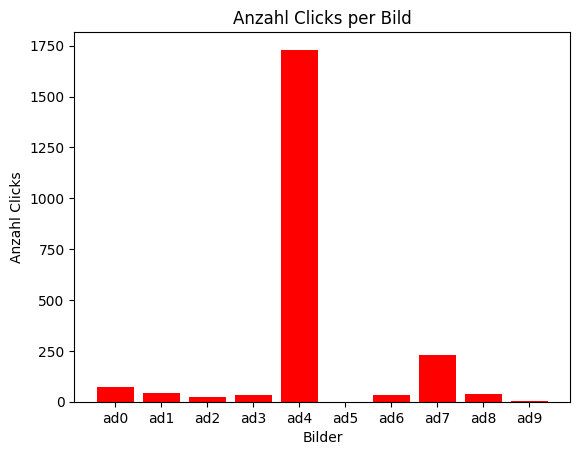

In [7]:
# Ihr Code für die Klicks
plt.bar(users.columns, sums_of_rewards, color="red")
plt.xlabel("Bilder")
plt.ylabel("Anzahl Clicks")
plt.title("Anzahl Clicks per Bild")

plt.show()